In [1]:
import numpy as np
import plotly.graph_objects as go
from jupyterquiz import display_quiz

def plot_deposits_with_slider(write_html=False):
    fig = go.Figure()
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Result"]
    # weeks = ["week " + str(i) for i in range(1, 53)] + ["Result"]
    weeks = [
        "Jan 1 — Jan 7",
        "Jan 8 — Jan 14",
        "Jan 15 — Jan 21",
        "Jan 22 — Jan 28",
        "Jan 29 — Feb 4",
        "Feb 5 — Feb 11",
        "Feb 12 — Feb 18",
        "Feb 19 — Feb 25",
        "Feb 26 — Mar 4",
        "Mar 5 — Mar 11",
        "Mar 12 — Mar 18",
        "Mar 19 — Mar 25",
        "Mar 26 — Apr 1",
        "Apr 2 — Apr 8",
        "Apr 9 — Apr 15",
        "Apr 16 — Apr 22",
        "Apr 23 — Apr 29",
        "Apr 30 — May 6",
        "May 7 — May 13",
        "May 14 — May 20",
        "May 21 — May 27",
        "May 28 — Jun 3",
        "Jun 4 — Jun 10",
        "Jun 11 — Jun 17",
        "Jun 18 — Jun 24",
        "Jun 25 — Jul 1",
        "Jul 2 — Jul 8",
        "Jul 9 — Jul 15",
        "Jul 16 — Jul 22",
        "Jul 23 — Jul 29",
        "Jul 30 — Aug 5",
        "Aug 6 — Aug 12",
        "Aug 13 — Aug 19",
        "Aug 20 — Aug 26",
        "Aug 27 — Sep 2",
        "Sep 3 — Sep 9",
        "Sep 10 — Sep 16",
        "Sep 17 — Sep 23",
        "Sep 24 — Sep 30",
        "Oct 1 — Oct 7",
        "Oct 8 — Oct 14",
        "Oct 15 — Oct 21",
        "Oct 22 — Oct 28",
        "Oct 29 — Nov 4",
        "Nov 5 — Nov 11",
        "Nov 12 — Nov 18",
        "Nov 19 — Nov 25",
        "Nov 26 — Dec 2",
        "Dec 3 — Dec 9",
        "Dec 10 — Dec 16",
        "Dec 17 — Dec 23",
        "Dec 24 — Dec 30",
        "Result"
    ]
    weeks = [week[:6] for week in weeks]
    # days = [months[i // 30] if i % 30 == 15 else "" for i in range(365)] + ["Result"]
    days = 15 * [""] + ["Jan 16"] + 29 * [""] + ["Feb 15"] + 28 * [""] + ["Mar 16"] + \
        29 * [""] + ["Apr 15"] + 29 * [""] + ["May 15"] + 30 * [""] + ["Jun 15"] + \
        30 *[""] + ["Jul 16"] + 30 * [""] + ["Aug 16"] + 29*[""] + ["Sep 15"] + \
        29 *[""] + ["Oct 15"] + 30 * [""] + ["Nov 15"] + 29 * [""] + ["Dec 15"] + 16 * [""] + ["Result"]
    xs = np.arange(13)
    ys = np.ones_like(xs)
    ys[-1] = 2
    colors = 12*['blue']+["red"]
    fig.add_trace(go.Bar(x=xs, y=ys, name=f"annually", visible=False, marker_color=colors))
    ys = (1 + 1/2) ** (np.repeat(np.arange(3), 6))[:13]
    fig.add_trace(go.Bar(x=xs, y=ys, name=f"semiannualy", visible=False,  marker_color=colors))
    ys = (1 + 1/3) ** (np.repeat(np.arange(4), 4))[:13]
    fig.add_trace(go.Bar(x=xs, y=ys, name=f"quaterly", visible=False,  marker_color=colors))
    ys = (1 + 1/6) ** (np.repeat(np.arange(7), 2))[:13]
    fig.add_trace(go.Bar(x=xs, y=ys, name=f"bimonthly", visible=False,  marker_color=colors))
    ys = (1 + 1/12) ** np.arange(13)
    fig.add_trace(go.Bar(x=xs, y=ys, name=f"monthly", visible=False,  marker_color=colors))
    ys = (1 + 1/52) ** np.arange(53)
    fig.add_trace(go.Bar(x=np.arange(53), y=ys, name=f"weekly", visible=False,  marker_color=52*["blue"]+["red"]))
    ys = (1 + 1/365) ** np.arange(366)
    ys_exp = np.exp(np.linspace(0, 1, num=366))
    fig.add_trace(go.Bar(x=np.arange(366), y=ys, name=f"daily", visible=False, marker_color=365*["blue"]+["red"]))
    # fig.add_trace(go.Scatter(x=np.arange(366), y=ys_exp, name="exp", visible=False, line=dict(color="red", width=2, dash="dash")))
    
    fig.update_layout(title={"text": "Deposit amount, $", "x": 0.5},
                      xaxis_title="month",
                      yaxis_title="deposit",
                      xaxis=dict(ticktext=months, tickmode = 'array', tickvals = np.arange(13)),
                      yaxis=dict(tickmode = 'array', tickvals=[0, 0.5, 1, 1.5, 1.75, 2, 2.25, 2.5, 2.71828]),
                      margin=dict(t=50))
    
    fig.data[4].visible = True
    labels=['annually', "semiannually", "quaterly", "bimonthly", "monthly", "weekly", "daily"]
    
    def get_ticktext(i):
        if i < 5:
            return months
        if i == 5:
            return weeks
        return days
    
    def get_tickvals(i):
        if i < 5:
            return np.arange(13)
        if i == 5:
            return np.arange(53)
        return np.arange(366)

    # Create and add slider
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method="update",
            args=[
                {"visible": [False] * len(fig.data)},
                {"xaxis": dict(ticktext=get_ticktext(i), tickmode='array', tickvals=get_tickvals(i))}
            ],  # layout attribute
            label=labels[i]
        )
        step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
        steps.append(step)

    sliders = [dict(
        active=4,
        pad={"t": 50},
        currentvalue={"prefix": "frequency: "}, 
        steps=steps
    )]
        
    fig.update_layout(
        sliders=sliders,
    )
    
    if write_html:
        fig.write_html("slider_deposit.html", full_html=False, include_plotlyjs='cdn', include_mathjax='cdn')
    fig.show()
    
def plot_deposits_with_exp(n_years=10, write_html=False):
    fig = go.Figure()
    months = np.linspace(0, n_years, num=12*n_years + 1)
    ys_months = (1 + 1/12) ** (12*months)
    fig.add_trace(go.Bar(x=months, y=ys_months, name=f"monthly", visible=False, showlegend=False))
    weeks = np.linspace(0, n_years, num=52*n_years + 1)
    ys_weeks = (1 + 1/52) ** (52*weeks)
    fig.add_trace(go.Bar(x=weeks, y=ys_weeks, name=f"weekly", visible=False, showlegend=False))
    days = np.linspace(0, n_years, num=365*n_years + 1)
    ys_days = (1 + 1/365) ** (365*days[::n_years])
    fig.add_trace(go.Bar(x=days[::n_years], y=ys_days, name=f"daily", visible=False, showlegend=False))
    fig.add_trace(go.Scatter(x=days, y=np.exp(days), name="exp", visible=False, showlegend=False, line=dict(color="red", width=2, dash="dot")))
    
    fig.update_layout(title={"text": "Exponential growth", "x": 0.5},
                      xaxis_title="year",
                      yaxis_title="deposit",
                      xaxis=dict(range=[0, n_years], tick0=0, dtick=1),
                      yaxis=dict(range=[0, np.exp(n_years)]),
                      margin=dict(t=50),
                      width=900,
                      height=500)
    
    fig.data[0].visible = True
    fig.data[-1].visible = True

    fig.update_layout(
                  xaxis_title=r"year",
                  yaxis_title=r"deposit amount",
                  margin=dict(t=50),
                  updatemenus=[dict(
                    type="buttons",
                    buttons=[
                        dict(label="monthly", method="update", args=[
                            {"visible": [True, False, False, True]},
                        ]),
                        dict(label="weekly", method="update", args=[
                            {"visible": [False, True, False, True]},
                        ]),
                        dict(label="daily", method="update", args=[
                            {"visible": [False, False, True, True]},
                        ]),
                    ]
                  )]
                 )
    
    if write_html:
        fig.write_html("deposit_buttons.html", full_html=False, include_plotlyjs='cdn', include_mathjax='cdn')
    fig.show()

In [53]:
def plot_deposits_growth_decay(ps, write_html=False):
    fig = go.Figure()
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Result"]
    xs = np.linspace(0, 1, num=366)
    for p in ps:
        ys = np.exp(xs * 0.01*p)
        fig.add_trace(go.Scatter(x=xs, y=ys, name=f"{p}%", visible=False, fill="tozeroy", line=dict(color="red", width=2)))

    fig.update_layout(title={"text": "Deposit amount with continuous rate", "x": 0.5},
                      yaxis=dict(title="deposit", range=(0, 2)),
                      xaxis=dict(title="time", ticktext=months, tickmode = 'array', tickvals = xs[15::30]),
                      margin=dict(t=50))
    
    middle = len(ps) // 2
    fig.data[middle].visible = True
    
    def get_yrange(i):
        if i < middle:
            return (0, 2)
        if ps[i] <= 100:
            return (0, 3)
        return (0, np.exp(ps[i]*0.01))

    # Create and add slider
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method="update",
            args=[
                {"visible": [False] * len(fig.data)},
                {"yaxis": dict(title="deposit", range=get_yrange(i))}
            ],  # layout attribute
            label=str(ps[i])
        )
        step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
        steps.append(step)

    sliders = [dict(
        active=middle,
        pad={"t": 50},
        currentvalue={"prefix": "rate, %: "}, 
        steps=steps
    )]
        
    fig.update_layout(
        sliders=sliders,
    )
    
    if write_html:
        fig.write_html("slider_deposit.html", full_html=False, include_plotlyjs='cdn', include_mathjax='cdn')
    fig.show()
    
def plot_euler_sequences(n_max, n_show):
    fig = go.Figure()
    ns = np.arange(1, n_max + 1)
    x_n = (1 + 1./ns) ** ns
    y_n = (1 + 1./ns) ** (ns + 1)
    fig.add_trace(go.Scatter(x=ns, y=x_n, name="$x_n = \\big(1 + \\frac 1n\\big)^n$" if False else "x_n", mode='lines+markers'))
    fig.add_trace(go.Scatter(x=ns, y=y_n, name="$y_n = \\big(1 + \\frac 1n\\big)^{n+1}$" if False else "y_n", mode='lines+markers'))
    fig.add_trace(go.Scatter(x=(1, n_max), y=(np.e, np.e), name="e", line=dict(dash="dash", color="green")))
    fig.update_layout(xaxis=dict(range=[0.9, n_show], rangemode="nonnegative"), xaxis_title="n", 
                      legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.5)
    )
    fig.show()

In [6]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

font = {'family' : 'serif',
        'size'   : 17,
        'weight' : 'normal'
       }

plt.rc('font', **font)

plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', titlesize=20)
plt.rc('legend', fontsize=18)
plt.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
plt.rc('text.latex', preamble=r'\usepackage[T2A]{fontenc}')
plt.rc('text.latex', preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

def plot_e_limit(n_max=50):
    plt.figure(figsize = (11, 6))
    n_array = np.arange(1, n_max + 1)
    x_n = np.power(1 + 1. / n_array, n_array)
    y_n = np.power(1 + 1. / n_array, n_array + 1)
    plt.plot(n_array, x_n, c='r', lw=2, marker='o', markeredgecolor='b', label=r'$x_n = \big(1+\frac 1n\big)^n$')
    plt.plot(n_array, y_n, c='orange', lw=2, marker='o', markeredgecolor='brown', label=r'$y_n = \big(1+\frac 1 n\big)^{n+1}$')
    plt.plot(n_array, np.e * np.ones_like(n_array), ls = '--', c='g', label="$e$")
    plt.ylim(2.4, 3)
    plt.xlim(1, n_max)
    plt.xlabel(r'$n$', fontsize=20)
    plt.title("Euler's number")
    plt.grid(ls=':')
    plt.legend()
    plt.show();

# Сложный процент

```{figure} https://www.sapaviva.com/wp-content/uploads/2017/07/31S.-Jacob-Bernoulli-1654-1705.jpg
---
width: 150px
align: right
---
Яков Бернулли
```
 
Швейцарский математик Яков Бернулли (1655 — 1705) открыл число $е$, изучая вопрос о банковском вкладе с капитализацией процентов, при котором начисленные проценты прибавляются к сумме вклада после каждого отчётного периода. Такой депозит также называется вкладом со **сложным процентом** в противовес вкладу с **простым проценту**, когда проценты по вкладу выплачиваются вкладчику, а сумма депозита на следующий период остаётся прежней. 

## Вклад в аргентинском банке

Представьте, что вы положили $\$1$ в банк под $100\%$ годовых...

```{admonition} Но таких процентов не бывает в природе! Тем более в \$!
:class: warning, dropdown

Ну смотря где. В Аргентине, например, очень высокая инфляция, а в 2023 году она даже пробила отметку в $100\%$ годовых:

<img src="https://img.take-profit.org/graphs/indicatorspresident/40/1537/mauricio-macri-argentina-inflation-rate-2015-2023.png" align="center"/>

При такой инфляции процентная ставка по вкладу в $100\%$ смотрится вполне реалистично. Да, и по странному стечению обстоятельств [аргентинское песо](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE) также обозначается символом \$.
```

<span style="display:none" id="q_deposit_1">W3sicXVlc3Rpb24iOiAiXHUwNDE4XHUwNDQyXHUwNDMwXHUwNDNhLCBcdTA0MzJcdTA0NGIgXHUwNDNmXHUwNDNlXHUwNDNiXHUwNDNlXHUwNDM2XHUwNDM4XHUwNDNiXHUwNDM4ICRcXCQxJCBcdTA0MzIgXHUwNDMxXHUwNDMwXHUwNDNkXHUwNDNhIFx1MDQzZlx1MDQzZVx1MDQzNCAkMTAwXFwlJCBcdTA0MzNcdTA0M2VcdTA0MzRcdTA0M2VcdTA0MzJcdTA0NGJcdTA0NDUuIFx1MDQyMVx1MDQzYVx1MDQzZVx1MDQzYlx1MDQ0Y1x1MDQzYVx1MDQzZSBcdTA0NDMgXHUwNDMyXHUwNDMwXHUwNDQxIFx1MDQzMVx1MDQ0M1x1MDQzNFx1MDQzNVx1MDQ0MiBcdTA0MzRcdTA0MzVcdTA0M2RcdTA0MzVcdTA0MzMgXHUwNDNkXHUwNDMwIFx1MDQzMlx1MDQzYVx1MDQzYlx1MDQzMFx1MDQzNFx1MDQzNSBcdTA0NDdcdTA0MzVcdTA0NDBcdTA0MzVcdTA0MzcgXHUwNDMzXHUwNDNlXHUwNDM0PyIsICJ0eXBlIjogIm51bWVyaWMiLCAiYW5zd2VycyI6IFt7InR5cGUiOiAidmFsdWUiLCAidmFsdWUiOiAyLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJcdTA0MTJcdTA0MzVcdTA0NDBcdTA0M2RcdTA0M2UhICQxMDBcXCUkIFx1MDQzM1x1MDQzZVx1MDQzNFx1MDQzZVx1MDQzMlx1MDQ0Ylx1MDQ0NSBcdTIwMTQgXHUwNDRkXHUwNDQyXHUwNDNlIFx1MDQ0M1x1MDQzNFx1MDQzMlx1MDQzZVx1MDQzNVx1MDQzZFx1MDQzOFx1MDQzNTogJFxcJDEgKyBcXCQxID0gXFwkMiQifSwgeyJ0eXBlIjogInJhbmdlIiwgInJhbmdlIjogWy0xZSsxOCwgMF0sICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MWVcdTA0NDJcdTA0NDBcdTA0MzhcdTA0NDZcdTA0MzBcdTA0NDJcdTA0MzVcdTA0M2JcdTA0NGNcdTA0M2RcdTA0MzBcdTA0NGYgXHUwNDQxXHUwNDQzXHUwNDNjXHUwNDNjXHUwNDMwIFx1MDQzZVx1MDQzN1x1MDQzZFx1MDQzMFx1MDQ0N1x1MDQzMFx1MDQzNVx1MDQ0MiwgXHUwNDQ3XHUwNDQyXHUwNDNlIFx1MDQzMlx1MDQ0YiBcdTA0MzVcdTA0NDlcdTA0NTEgXHUwNDM4IFx1MDQzZVx1MDQ0MVx1MDQ0Mlx1MDQzMFx1MDQzYlx1MDQzOFx1MDQ0MVx1MDQ0YyBcdTA0MzRcdTA0M2VcdTA0M2JcdTA0MzZcdTA0M2RcdTA0NGIuIFx1MDQxZVx1MDQ0N1x1MDQzNVx1MDQzZFx1MDQ0YyBcdTA0NDFcdTA0NDJcdTA0NDBcdTA0NTFcdTA0M2NcdTA0M2RcdTA0NGJcdTA0MzkgXHUwNDMxXHUwNDMwXHUwNDNkXHUwNDNhIFx1MDQzZVx1MDQzYVx1MDQzMFx1MDQzN1x1MDQzMFx1MDQzYlx1MDQ0MVx1MDQ0ZiJ9LCB7InR5cGUiOiAicmFuZ2UiLCAicmFuZ2UiOiBbMCwgMV0sICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MTJcdTA0MzBcdTA0NDggXHUwNDMyXHUwNDNhXHUwNDNiXHUwNDMwXHUwNDM0IFx1MDQ0M1x1MDQzY1x1MDQzNVx1MDQzZFx1MDQ0Y1x1MDQ0OFx1MDQzOFx1MDQzYlx1MDQ0MVx1MDQ0Zj8gXHUwNDEzXHUwNDQwXHUwNDMwXHUwNDMxXHUwNDUxXHUwNDM2IFx1MDQ0MVx1MDQ0MFx1MDQzNVx1MDQzNFx1MDQ0YyBcdTA0MzFcdTA0MzVcdTA0M2JcdTA0MzAgXHUwNDM0XHUwNDNiXHUwNDRmISJ9LCB7InR5cGUiOiAidmFsdWUiLCAidmFsdWUiOiAxLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiXHUwNDEwIFx1MDQ0MVx1MDQzY1x1MDQ0Ylx1MDQ0MVx1MDQzYiBcdTA0M2RcdTA0MzVcdTA0NDFcdTA0NDJcdTA0MzggXHUwNDM0XHUwNDM1XHUwNDNkXHUwNDRjXHUwNDMzXHUwNDM4IFx1MDQzMiBcdTA0MzFcdTA0MzBcdTA0M2RcdTA0M2EsIFx1MDQzNVx1MDQ0MVx1MDQzYlx1MDQzOCBcdTA0MzJcdTA0NGIgXHUwNDNkXHUwNDM4XHUwNDQ3XHUwNDM1XHUwNDMzXHUwNDNlIFx1MDQzZFx1MDQzNSBcdTA0M2ZcdTA0M2VcdTA0M2JcdTA0NDNcdTA0NDdcdTA0MzBcdTA0MzVcdTA0NDJcdTA0MzU/In0sIHsidHlwZSI6ICJyYW5nZSIsICJyYW5nZSI6IFs1LCAxZSsxOF0sICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MTRcdTA0MzBcdTA0MzZcdTA0MzUgXHUwNDMyIFx1MDQxMFx1MDQ0MFx1MDQzM1x1MDQzNVx1MDQzZFx1MDQ0Mlx1MDQzOFx1MDQzZFx1MDQzNSBcdTA0M2RcdTA0MzUgXHUwNDNmXHUwNDNlXHUwNDNiXHUwNDQzXHUwNDQ3XHUwNDM4XHUwNDQyXHUwNDQxXHUwNDRmIFx1MDQ0MVx1MDQ0Mlx1MDQzZVx1MDQzYlx1MDQ0Y1x1MDQzYVx1MDQzZSBcdTA0MzdcdTA0MzBcdTA0NDBcdTA0MzBcdTA0MzFcdTA0M2VcdTA0NDJcdTA0MzBcdTA0NDJcdTA0NGMgXHUwNDNkXHUwNDMwIFx1MDQzNFx1MDQzNVx1MDQzZlx1MDQzZVx1MDQzN1x1MDQzOFx1MDQ0Mlx1MDQzNSJ9LCB7InR5cGUiOiAiZGVmYXVsdCIsICJmZWVkYmFjayI6ICJcdTA0MWRcdTA0MzVcdTA0NDIsIFx1MDQzNFx1MDQzNVx1MDQzZFx1MDQ0Y1x1MDQzM1x1MDQzOCBcdTA0M2JcdTA0NGVcdTA0MzFcdTA0NGZcdTA0NDIgXHUwNDQyXHUwNDNlXHUwNDQ3XHUwNDNkXHUwNDRiXHUwNDM5IFx1MDQ0MVx1MDQ0N1x1MDQ1MVx1MDQ0MiJ9XX1d</span>

In [4]:
display_quiz("#q_deposit_1")

<IPython.core.display.Javascript object>

<span style="display:none" id="q_deposit_2">W3sicXVlc3Rpb24iOiAiXHUwNDFhXHUwNDMwXHUwNDNhIFx1MDQzOFx1MDQzN1x1MDQzY1x1MDQzNVx1MDQzZFx1MDQzOFx1MDQ0Mlx1MDQ0MVx1MDQ0ZiBcdTA0M2VcdTA0NDJcdTA0MzJcdTA0MzVcdTA0NDIsIFx1MDQzNVx1MDQ0MVx1MDQzYlx1MDQzOCBcdTA0M2FcdTA0MzBcdTA0M2ZcdTA0MzhcdTA0NDJcdTA0MzBcdTA0M2JcdTA0MzhcdTA0MzdcdTA0MzBcdTA0NDZcdTA0MzhcdTA0NGYgXHUwNDNmXHUwNDQwXHUwNDNlXHUwNDQ2XHUwNDM1XHUwNDNkXHUwNDQyXHUwNDNlXHUwNDMyIFx1MDQzZlx1MDQ0MFx1MDQzZVx1MDQzOFx1MDQ0MVx1MDQ0NVx1MDQzZVx1MDQzNFx1MDQzOFx1MDQ0MiBcdTA0M2FcdTA0MzBcdTA0MzZcdTA0MzRcdTA0NGJcdTA0MzUgXHUwNDNmXHUwNDNlXHUwNDNiXHUwNDMzXHUwNDNlXHUwNDM0XHUwNDMwPyIsICJ0eXBlIjogIm51bWVyaWMiLCAiYW5zd2VycyI6IFt7InR5cGUiOiAidmFsdWUiLCAidmFsdWUiOiAyLjI1LCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJcdTA0MThcdTA0M2NcdTA0MzVcdTA0M2RcdTA0M2RcdTA0M2UgXHUwNDQyXHUwNDMwXHUwNDNhISBcdTA0MWRcdTA0MzAgMjUgXHUwNDQxXHUwNDM1XHUwNDNkXHUwNDQyXHUwNDMwXHUwNDMyXHUwNDNlIFx1MDQzMVx1MDQzZVx1MDQzYlx1MDQ0Y1x1MDQ0OFx1MDQzNSwgXHUwNDQ3XHUwNDM1XHUwNDNjIFx1MDQzNFx1MDQzYlx1MDQ0ZiBcdTA0MzJcdTA0M2FcdTA0M2JcdTA0MzBcdTA0MzRcdTA0MzAgXHUwNDQxIFx1MDQzZlx1MDQ0MFx1MDQzZVx1MDQ0MVx1MDQ0Mlx1MDQ0Ylx1MDQzYyBcdTA0M2ZcdTA0NDBcdTA0M2VcdTA0NDZcdTA0MzVcdTA0M2RcdTA0NDJcdTA0M2VcdTA0M2MifSwgeyJ0eXBlIjogInJhbmdlIiwgInJhbmdlIjogWy0xZSsxOCwgMF0sICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MWVcdTA0NDJcdTA0NDBcdTA0MzhcdTA0NDZcdTA0MzBcdTA0NDJcdTA0MzVcdTA0M2JcdTA0NGNcdTA0M2RcdTA0MzBcdTA0NGYgXHUwNDQxXHUwNDQzXHUwNDNjXHUwNDNjXHUwNDMwIFx1MDQzZVx1MDQzN1x1MDQzZFx1MDQzMFx1MDQ0N1x1MDQzMFx1MDQzNVx1MDQ0MiwgXHUwNDQ3XHUwNDQyXHUwNDNlIFx1MDQzMlx1MDQ0YiBcdTA0MzVcdTA0NDlcdTA0NTEgXHUwNDM4IFx1MDQzZVx1MDQ0MVx1MDQ0Mlx1MDQzMFx1MDQzYlx1MDQzOFx1MDQ0MVx1MDQ0YyBcdTA0MzRcdTA0M2VcdTA0M2JcdTA0MzZcdTA0M2RcdTA0NGIuIFx1MDQxZVx1MDQ0N1x1MDQzNVx1MDQzZFx1MDQ0YyBcdTA0NDFcdTA0NDJcdTA0NDBcdTA0NTFcdTA0M2NcdTA0M2RcdTA0NGJcdTA0MzkgXHUwNDMxXHUwNDMwXHUwNDNkXHUwNDNhIFx1MDQzZVx1MDQzYVx1MDQzMFx1MDQzN1x1MDQzMFx1MDQzYlx1MDQ0MVx1MDQ0ZiJ9LCB7InR5cGUiOiAicmFuZ2UiLCAicmFuZ2UiOiBbMCwgMV0sICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MTJcdTA0MzBcdTA0NDggXHUwNDMyXHUwNDNhXHUwNDNiXHUwNDMwXHUwNDM0IFx1MDQ0M1x1MDQzY1x1MDQzNVx1MDQzZFx1MDQ0Y1x1MDQ0OFx1MDQzOFx1MDQzYlx1MDQ0MVx1MDQ0Zj8gXHUwNDEzXHUwNDQwXHUwNDMwXHUwNDMxXHUwNDUxXHUwNDM2IFx1MDQ0MVx1MDQ0MFx1MDQzNVx1MDQzNFx1MDQ0YyBcdTA0MzFcdTA0MzVcdTA0M2JcdTA0MzAgXHUwNDM0XHUwNDNkXHUwNDRmISJ9LCB7InR5cGUiOiAidmFsdWUiLCAidmFsdWUiOiAxLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiXHUwNDEwIFx1MDQ0MVx1MDQzY1x1MDQ0Ylx1MDQ0MVx1MDQzYiBcdTA0M2RcdTA0MzVcdTA0NDFcdTA0NDJcdTA0MzggXHUwNDM0XHUwNDM1XHUwNDNkXHUwNDRjXHUwNDMzXHUwNDM4IFx1MDQzMiBcdTA0MzFcdTA0MzBcdTA0M2RcdTA0M2EsIFx1MDQzNVx1MDQ0MVx1MDQzYlx1MDQzOCBcdTA0MzJcdTA0NGIgXHUwNDNkXHUwNDM4XHUwNDQ3XHUwNDM1XHUwNDMzXHUwNDNlIFx1MDQzZFx1MDQzNSBcdTA0M2ZcdTA0M2VcdTA0M2JcdTA0NDNcdTA0NDdcdTA0MzBcdTA0MzVcdTA0NDJcdTA0MzU/In0sIHsidHlwZSI6ICJyYW5nZSIsICJyYW5nZSI6IFsxLCAyLjAwMDAwMDAwMDAwMDAwMV0sICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MjFcdTA0M2JcdTA0M2VcdTA0MzZcdTA0M2RcdTA0NGJcdTA0MzkgXHUwNDNmXHUwNDQwXHUwNDNlXHUwNDQ2XHUwNDM1XHUwNDNkXHUwNDQyIFx1MDQzZVx1MDQzMVx1MDQ0Ylx1MDQ0N1x1MDQzZFx1MDQzZSBcdTA0MzJcdTA0NGJcdTA0MzNcdTA0M2VcdTA0MzRcdTA0M2RcdTA0MzVcdTA0MzUgXHUwNDM0XHUwNDNiXHUwNDRmIFx1MDQzMlx1MDQzYVx1MDQzYlx1MDQzMFx1MDQzNFx1MDQ0N1x1MDQzOFx1MDQzYVx1MDQzMCwgXHUwNDNmXHUwNDNlXHUwNDRkXHUwNDQyXHUwNDNlXHUwNDNjXHUwNDQzIFx1MDQzZVx1MDQ0Mlx1MDQzMlx1MDQzNVx1MDQ0MiBcdTA0MzRcdTA0M2VcdTA0M2JcdTA0MzZcdTA0MzVcdTA0M2QgXHUwNDMxXHUwNDRiXHUwNDQyXHUwNDRjIFx1MDQzMVx1MDQzZVx1MDQzYlx1MDQ0Y1x1MDQ0OFx1MDQzNSwgXHUwNDQ3XHUwNDM1XHUwNDNjIFx1MDQzMiBcdTA0M2ZcdTA0NDBcdTA0MzVcdTA0MzRcdTA0NGJcdTA0MzRcdTA0NDNcdTA0NDlcdTA0MzVcdTA0M2MgXHUwNDMyXHUwNDNlXHUwNDNmXHUwNDQwXHUwNDNlXHUwNDQxXHUwNDM1In0sIHsidHlwZSI6ICJyYW5nZSIsICJyYW5nZSI6IFsxMCwgMWUrMThdLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiXHUwNDIyXHUwNDMwXHUwNDNhIFx1MDQzZVx1MDQzN1x1MDQzZVx1MDQzYlx1MDQzZVx1MDQ0Mlx1MDQzOFx1MDQ0Mlx1MDQ0Y1x1MDQ0MVx1MDQ0ZiBcdTA0M2RcdTA0MzUgXHUwNDNmXHUwNDNlXHUwNDM3XHUwNDMyXHUwNDNlXHUwNDNiXHUwNDM4XHUwNDQyIFx1MDQzNFx1MDQzMFx1MDQzNlx1MDQzNSBcdTA0NDFcdTA0M2JcdTA0M2VcdTA0MzZcdTA0M2RcdTA0NGJcdTA0MzkgXHUwNDNmXHUwNDQwXHUwNDNlXHUwNDQ2XHUwNDM1XHUwNDNkXHUwNDQyIn0sIHsidHlwZSI6ICJkZWZhdWx0IiwgImZlZWRiYWNrIjogIlx1MDQxZFx1MDQzNVx1MDQ0MiwgXHUwNDM0XHUwNDM1XHUwNDNkXHUwNDRjXHUwNDMzXHUwNDM4IFx1MDQzYlx1MDQ0ZVx1MDQzMVx1MDQ0Zlx1MDQ0MiBcdTA0NDJcdTA0M2VcdTA0NDdcdTA0M2RcdTA0NGJcdTA0MzkgXHUwNDQxXHUwNDQ3XHUwNDUxXHUwNDQyIn1dfV0=</span>

In [5]:
display_quiz("#q_deposit_2")

<IPython.core.display.Javascript object>

```{admonition} Решение (не открывайте сразу, попробуйте сначала решить самостоятельно)
:class: tip, dropdown

* За первые полгода вам начислят $50$ центов, и у вас станет $\$1.5$ на вкладе
* За второе полугодие вы получите $50\%$ от полутора песо, то есть 75 сентаво
* В итоге у вас окажется $\$1.5 + \$0.75 = \$2.25$

Можно было рассуждать несколько иначе:
* За каждый расчётный промежток сумма вклада увеличивается на $50\%$, то есть в полтора раза
* Стало быть, через год у вас будет $1.5 \cdot 1.5 \cdot \$1 = \$2.25,$
или $\big(1 + \frac 12\big)^2$ песо.
```

<span style="display:none" id="q_deposit_12">W3sicXVlc3Rpb24iOiAiXHUwNDEwIFx1MDQzZlx1MDQzZSBcdTA0M2FcdTA0MzBcdTA0M2FcdTA0M2VcdTA0MzkgXHUwNDQ0XHUwNDNlXHUwNDQwXHUwNDNjXHUwNDQzXHUwNDNiXHUwNDM1IFx1MDQzMlx1MDQ0Ylx1MDQ0N1x1MDQzOFx1MDQ0MVx1MDQzYlx1MDQ0Zlx1MDQzNVx1MDQ0Mlx1MDQ0MVx1MDQ0ZiBcdTA0MzhcdTA0NDJcdTA0M2VcdTA0MzNcdTA0M2VcdTA0MzJcdTA0MzBcdTA0NGYgXHUwNDQxXHUwNDQzXHUwNDNjXHUwNDNjXHUwNDMwIFx1MDQzMlx1MDQzYVx1MDQzYlx1MDQzMFx1MDQzNFx1MDQzMCAoXHUwNDMyIFx1MDQzZlx1MDQzNVx1MDQ0MVx1MDQzZSksIFx1MDQzNVx1MDQ0MVx1MDQzYlx1MDQzOCBcdTA0M2ZcdTA0NDBcdTA0M2VcdTA0NDZcdTA0MzVcdTA0M2RcdTA0NDJcdTA0NGIgXHUwNDNhXHUwNDMwXHUwNDNmXHUwNDM4XHUwNDQyXHUwNDMwXHUwNDNiXHUwNDM4XHUwNDM3XHUwNDM4XHUwNDQwXHUwNDQzXHUwNDRlXHUwNDQyXHUwNDQxXHUwNDRmIFx1MDQzYVx1MDQzMFx1MDQzNlx1MDQzNFx1MDQ0Ylx1MDQzOSBcdTA0M2NcdTA0MzVcdTA0NDFcdTA0NGZcdTA0NDY/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICIkJFxcQmlnKDEgK1xcZnJhYyAxezEyfVxcQmlnKV57MTJ9JCQiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJcdTA0MTBcdTA0MzFcdTA0NDFcdTA0M2VcdTA0M2JcdTA0NGVcdTA0NDJcdTA0M2RcdTA0M2UgXHUwNDMyXHUwNDM1XHUwNDQwXHUwNDNkXHUwNDNlISBcdTA0MWFcdTA0MzBcdTA0MzZcdTA0MzRcdTA0NGJcdTA0MzkgXHUwNDNjXHUwNDM1XHUwNDQxXHUwNDRmXHUwNDQ2IFx1MDQzMlx1MDQzYVx1MDQzYlx1MDQzMFx1MDQzNCBcdTA0NDNcdTA0MzJcdTA0MzVcdTA0M2JcdTA0MzhcdTA0NDdcdTA0MzhcdTA0MzJcdTA0MzBcdTA0MzVcdTA0NDJcdTA0NDFcdTA0NGYgXHUwNDMyICQxXFxmcmFjezF9ezEyfSQgXHUwNDQwXHUwNDMwXHUwNDM3In0sIHsiYW5zd2VyIjogIiQkXFxCaWcoMSArXFxmcmFjIDF7MzB9XFxCaWcpXnszMH0kJCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MjJcdTA0NDNcdTA0NDIgXHUwNDMyXHUwNDMwXHUwNDM2XHUwNDNkXHUwNDNlIFx1MDQ0N1x1MDQzOFx1MDQ0MVx1MDQzYlx1MDQzZSBcdTA0M2NcdTA0MzVcdTA0NDFcdTA0NGZcdTA0NDZcdTA0MzVcdTA0MzIgXHUwNDMyIFx1MDQzM1x1MDQzZVx1MDQzNFx1MDQ0MywgXHUwNDMwIFx1MDQzZFx1MDQzNSBcdTA0MzRcdTA0M2RcdTA0MzVcdTA0MzkgXHUwNDMyIFx1MDQzY1x1MDQzNVx1MDQ0MVx1MDQ0Zlx1MDQ0Nlx1MDQzNSJ9LCB7ImFuc3dlciI6ICIkJFxcQmlnKDEgK1xcZnJhYyAxezEyfVxcQmlnKV4yJCQiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiXHUwNDIxXHUwNDQyXHUwNDNlXHUwNDNiXHUwNDRjXHUwNDNhXHUwNDNlIFx1MDQzMVx1MDQ0M1x1MDQzNFx1MDQzNVx1MDQ0MiBcdTA0M2RcdTA0MzAgXHUwNDMyXHUwNDNhXHUwNDNiXHUwNDMwXHUwNDM0XHUwNDM1IFx1MDQzZlx1MDQzZVx1MDQ0MVx1MDQzYlx1MDQzNSBcdTA0MzRcdTA0MzJcdTA0NDNcdTA0NDUgXHUwNDNjXHUwNDM1XHUwNDQxXHUwNDRmXHUwNDQ2XHUwNDM1XHUwNDMyIn0sIHsiYW5zd2VyIjogIiQkXFxCaWcoMSArXFxmcmFjIDF7MzB9XFxCaWcpXjIkJCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MjFcdTA0M2VcdTA0MzJcdTA0NDFcdTA0MzVcdTA0M2MgXHUwNDNkXHUwNDM1IFx1MDQzZlx1MDQzZVx1MDQ0NVx1MDQzZVx1MDQzNlx1MDQzNSBcdTA0M2RcdTA0MzAgXHUwNDNmXHUwNDQwXHUwNDMwXHUwNDMyXHUwNDM0XHUwNDQzIn1dfV0=</span>

In [6]:
display_quiz("#q_deposit_12")

<IPython.core.display.Javascript object>

Возможно, вы уже уловили закономерность: наш песо превращается в

* $\Big(1 + \frac 1{2}\Big)^{2} = 2$ песо $25$ сентаво при капитализации раз в полгода;
* $\Big(1 + \frac 1{12}\Big)^{12}\approx 2$ песо $61$ сентаво при ежемесячной капитализации;
* $\Big(1 + \frac 1{365}\Big)^{365}\approx 2$ песо $71$ сентаво при ежедневной капитализации;
* $\big(1+\frac 1n\big)^n$ песо, если капитализация происходит каждую $\frac 1n$-ю часть года.

Последняя общая формула объясняется тем, что на каждом отчётном периоде вклад увеличивается на $\frac{100}n\%$, что эквивалентно умножению текущей суммы на $1 + \frac 1n$.

<span style="display:none" id="q_deposit_D">W3sicXVlc3Rpb24iOiAiXHUwNDFhXHUwNDMwXHUwNDNhIFx1MDQzOFx1MDQzN1x1MDQzY1x1MDQzNVx1MDQzZFx1MDQzOFx1MDQ0Mlx1MDQ0MVx1MDQ0ZiBcdTA0M2VcdTA0MzFcdTA0NDlcdTA0MzBcdTA0NGYgXHUwNDQ0XHUwNDNlXHUwNDQwXHUwNDNjXHUwNDQzXHUwNDNiXHUwNDMwIFx1MDQzOFx1MDQ0Mlx1MDQzZVx1MDQzM1x1MDQzZVx1MDQzMlx1MDQzZVx1MDQzOSBcdTA0NDFcdTA0NDNcdTA0M2NcdTA0M2NcdTA0NGIgXHUwNDM0XHUwNDM1XHUwNDNmXHUwNDNlXHUwNDM3XHUwNDM4XHUwNDQyXHUwNDMwIFx1MDQ0MVx1MDQzZSBcdTA0NDFcdTA0M2JcdTA0M2VcdTA0MzZcdTA0M2RcdTA0NGJcdTA0M2MgXHUwNDNmXHUwNDQwXHUwNDNlXHUwNDQ2XHUwNDM1XHUwNDNkXHUwNDQyXHUwNDNlXHUwNDNjLCBcdTA0MzVcdTA0NDFcdTA0M2JcdTA0MzggXHUwNDMyXHUwNDRiIFx1MDQzMlx1MDQzYlx1MDQzZVx1MDQzNlx1MDQzOFx1MDQ0Mlx1MDQzNSBcdTA0M2RcdTA0MzUgJDEkLCBcdTA0MzAgJEQkIFx1MDQzZlx1MDQzNVx1MDQ0MVx1MDQzZT8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIiQkRFxcQmlnKDEgKyBcXGZyYWMgMW5cXEJpZylebiQkIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiXHUwNDEyXHUwNDQxXHUwNDUxIFx1MDQ0Mlx1MDQzMFx1MDQzYSwgXHUwNDM4XHUwNDQyXHUwNDNlXHUwNDMzXHUwNDNlXHUwNDMyXHUwNDMwXHUwNDRmIFx1MDQ0MVx1MDQ0M1x1MDQzY1x1MDQzY1x1MDQzMCBcdTA0M2ZcdTA0NDBcdTA0M2VcdTA0M2ZcdTA0M2VcdTA0NDBcdTA0NDZcdTA0MzhcdTA0M2VcdTA0M2RcdTA0MzBcdTA0M2JcdTA0NGNcdTA0M2RcdTA0MzAgXHUwNDNmXHUwNDM1XHUwNDQwXHUwNDMyXHUwNDNlXHUwNDNkXHUwNDMwXHUwNDQ3XHUwNDMwXHUwNDNiXHUwNDRjXHUwNDNkXHUwNDNlXHUwNDNjXHUwNDQzIFx1MDQzMlx1MDQzN1x1MDQzZFx1MDQzZVx1MDQ0MVx1MDQ0MyJ9LCB7ImFuc3dlciI6ICIkJFxcQmlnKDEgKyBcXGZyYWMgRG5cXEJpZylebiQkIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIlx1MDQxZFx1MDQzNSBcdTA0NDJcdTA0MzBcdTA0M2EifSwgeyJhbnN3ZXIiOiAiJCREXFxCaWcoMSArIFxcZnJhYyBEblxcQmlnKV5uJCQiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiXHUwNDFkXHUwNDM1IFx1MDQ0Mlx1MDQzMFx1MDQzYSJ9LCB7ImFuc3dlciI6ICIkJFxcQmlnKDEgKyBcXGZyYWMgMW5cXEJpZylee25EfSQkIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIlx1MDQxZFx1MDQzNSBcdTA0NDJcdTA0MzBcdTA0M2EifSwgeyJhbnN3ZXIiOiAiJCRcXEJpZyhEICsgXFxmcmFjIDFuXFxCaWcpXm4kJCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MWRcdTA0MzUgXHUwNDQyXHUwNDMwXHUwNDNhIn0sIHsiYW5zd2VyIjogIiQkMkQkJCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MjJcdTA0MzBcdTA0M2EgXHUwNDMxXHUwNDQzXHUwNDM0XHUwNDM1XHUwNDQyIFx1MDQzZlx1MDQ0MFx1MDQzOCBcdTA0MzJcdTA0M2FcdTA0M2JcdTA0MzBcdTA0MzRcdTA0MzUgXHUwNDQxIFx1MDQzZlx1MDQ0MFx1MDQzZVx1MDQ0MVx1MDQ0Mlx1MDQ0Ylx1MDQzYyBcdTA0M2ZcdTA0NDBcdTA0M2VcdTA0NDZcdTA0MzVcdTA0M2RcdTA0NDJcdTA0M2VcdTA0M2MifV19XQ==</span>

In [7]:
display_quiz("#q_deposit_D")

<IPython.core.display.Javascript object>

С помощью общей формулы легко расчитать итоговую сумму вклада при любой частоте капитализации процентов:

|  **Периодичность выплаты %**        | **Сумма вклада через год, \$**                         |
|:-----------------------------------|:------------------------------------|
|  Ежеквартально                      | $2.4414$             |
|  Ежемесячно                         |  $2.613$         | 
|  Еженедельно                        |  $2.6926$       |
|  Ежедневно                          | $2.714567482$ |
|  Ежечасно                      |$2.7182792427$ |
|  Ежесекундно                | $2.718281778469$ |
| Раз в наносекунду                   | $2.718281828459045$ |


Как видно из этой таблицы, поначалу измельчение отчётного периода даёт заметный эффект, однако, выгода от его дальнейшего уменьшения снижается. Например, переход от ежедневной капитализации к ежесекундной позволяет выиграть не более половины сентаво.

In [18]:
plot_deposits_with_slider()

<span style="display:none" id="q_deposit_ns">W3sicXVlc3Rpb24iOiAiXHUwNDFhXHUwNDMwXHUwNDNhXHUwNDM4XHUwNDNjIFx1MDQzZlx1MDQ0MFx1MDQzOFx1MDQzY1x1MDQzNVx1MDQ0MFx1MDQzZFx1MDQzZSBcdTA0MzRcdTA0M2VcdTA0M2JcdTA0MzZcdTA0M2RcdTA0M2UgXHUwNDMxXHUwNDRiXHUwNDQyXHUwNDRjIFx1MDQ0N1x1MDQzOFx1MDQ0MVx1MDQzYlx1MDQzZSAkbiQsIFx1MDQ0N1x1MDQ0Mlx1MDQzZVx1MDQzMVx1MDQ0YiBcdTA0M2FcdTA0MzBcdTA0M2ZcdTA0MzhcdTA0NDJcdTA0MzBcdTA0M2JcdTA0MzhcdTA0MzdcdTA0MzBcdTA0NDZcdTA0MzhcdTA0NGYgXHUwNDNmXHUwNDQwXHUwNDNlXHUwNDM4XHUwNDQxXHUwNDQ1XHUwNDNlXHUwNDM0XHUwNDM4XHUwNDNiXHUwNDMwIFx1MDQzYVx1MDQzMFx1MDQzNlx1MDQzNFx1MDQ0M1x1MDQ0ZSBcdTA0M2RcdTA0MzBcdTA0M2RcdTA0M2VcdTA0NDFcdTA0MzVcdTA0M2FcdTA0NDNcdTA0M2RcdTA0MzRcdTA0NDM/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICIzIFx1MDQ0Mlx1MDQ0MFx1MDQzOFx1MDQzYlx1MDQzYlx1MDQzOFx1MDQzZVx1MDQzZFx1MDQzMCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICIkM1xcY2RvdCAxMF57MTJ9JD8gXHUwNDFjXHUwNDMwXHUwNDNiXHUwNDNlXHUwNDMyXHUwNDMwXHUwNDQyXHUwNDNlIFx1MDQzMVx1MDQ0M1x1MDQzNFx1MDQzNVx1MDQ0MiJ9LCB7ImFuc3dlciI6ICIzMCBcdTA0NDJcdTA0NDBcdTA0MzhcdTA0M2JcdTA0M2JcdTA0MzhcdTA0M2VcdTA0M2RcdTA0M2VcdTA0MzIiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiXHUwNDEwIFx1MDQzZlx1MDQzZVx1MDQ0MVx1MDQ0N1x1MDQzOFx1MDQ0Mlx1MDQzMFx1MDQ0Mlx1MDQ0Yz8ifSwgeyJhbnN3ZXIiOiAiMzAwIFx1MDQ0Mlx1MDQ0MFx1MDQzOFx1MDQzYlx1MDQzYlx1MDQzOFx1MDQzZVx1MDQzZFx1MDQzZVx1MDQzMiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MTAgXHUwNDNmXHUwNDNlXHUwNDQxXHUwNDQ3XHUwNDM4XHUwNDQyXHUwNDMwXHUwNDQyXHUwNDRjPyJ9LCB7ImFuc3dlciI6ICIzIFx1MDQzYVx1MDQzMlx1MDQzMFx1MDQzNFx1MDQ0MFx1MDQzOFx1MDQzYlx1MDQzYlx1MDQzOFx1MDQzZVx1MDQzZFx1MDQzMCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MTAgXHUwNDNmXHUwNDNlXHUwNDQxXHUwNDQ3XHUwNDM4XHUwNDQyXHUwNDMwXHUwNDQyXHUwNDRjPyJ9LCB7ImFuc3dlciI6ICIzMCBcdTA0M2FcdTA0MzJcdTA0MzBcdTA0MzRcdTA0NDBcdTA0MzhcdTA0M2JcdTA0MzhcdTA0M2VcdTA0M2RcdTA0M2VcdTA0MzIiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJcdTA0MTFcdTA0MzhcdTA0M2RcdTA0MzNcdTA0M2UhIFx1MDQxNVx1MDQ0MVx1MDQzYlx1MDQzOCBcdTA0NDJcdTA0M2VcdTA0NDdcdTA0M2RcdTA0MzVcdTA0MzUsIFx1MDQ0Mlx1MDQzZSAkMTBeOSBcXGNkb3QgMzY1XFxjZG90ODY0MDAgPSAzMSQgXHUwNDNhXHUwNDMyXHUwNDMwXHUwNDM0XHUwNDQwXHUwNDM4XHUwNDNiXHUwNDNiXHUwNDM4XHUwNDNlXHUwNDNkICQ1MzYkIFx1MDQ0Mlx1MDQ0MFx1MDQzOFx1MDQzYlx1MDQzYlx1MDQzOFx1MDQzZVx1MDQzZFx1MDQzZVx1MDQzMiJ9LCB7ImFuc3dlciI6ICIzMDAgXHUwNDNhXHUwNDMyXHUwNDMwXHUwNDM0XHUwNDQwXHUwNDM4XHUwNDNiXHUwNDNiXHUwNDM4XHUwNDNlXHUwNDNkXHUwNDNlXHUwNDMyIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIlx1MDQxZlx1MDQzNVx1MDQ0MFx1MDQzNVx1MDQzMVx1MDQzZVx1MDQ0MCJ9XX1d</span>

<span style="display:none" id="q_compound_interest">W3sicXVlc3Rpb24iOiAiMSBcdTA0NGZcdTA0M2RcdTA0MzJcdTA0MzBcdTA0NDBcdTA0NGYgXHUwNDMyXHUwNDRiIFx1MDQzZlx1MDQzZVx1MDQzYlx1MDQzZVx1MDQzNlx1MDQzOFx1MDQzYlx1MDQzOCBcXCQxIFx1MDQzZlx1MDQzZVx1MDQzNCAkMTAwXFwlJCBcdTA0MzNcdTA0M2VcdTA0MzRcdTA0M2VcdTA0MzJcdTA0NGJcdTA0NDUgXHUwNDQxIFx1MDQzNVx1MDQzNlx1MDQzNVx1MDQzY1x1MDQzNVx1MDQ0MVx1MDQ0Zlx1MDQ0N1x1MDQzZFx1MDQzZVx1MDQzOSBcdTA0M2FcdTA0MzBcdTA0M2ZcdTA0MzhcdTA0NDJcdTA0MzBcdTA0M2JcdTA0MzhcdTA0MzdcdTA0MzBcdTA0NDZcdTA0MzhcdTA0MzVcdTA0MzkuIFx1MDQxYVx1MDQzZVx1MDQzM1x1MDQzNFx1MDQzMCBcdTA0NDFcdTA0NDNcdTA0M2NcdTA0M2NcdTA0MzAgXHUwNDMyXHUwNDMwXHUwNDQ4XHUwNDM1XHUwNDMzXHUwNDNlIFx1MDQzMlx1MDQzYVx1MDQzYlx1MDQzMFx1MDQzNFx1MDQzMCBcdTA0MzJcdTA0M2ZcdTA0MzVcdTA0NDBcdTA0MzJcdTA0NGJcdTA0MzUgXHUwNDNmXHUwNDQwXHUwNDM1XHUwNDMyXHUwNDRiXHUwNDQxXHUwNDM4XHUwNDQyIFxcJDI/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICIxIFx1MDQ0MVx1MDQzNVx1MDQzZFx1MDQ0Mlx1MDQ0Zlx1MDQzMVx1MDQ0MFx1MDQ0ZiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MWRcdTA0MzVcdTA0NDIsIFx1MDQzMlx1MDQzZFx1MDQzOFx1MDQzY1x1MDQzMFx1MDQ0Mlx1MDQzNVx1MDQzYlx1MDQ0Y1x1MDQzZFx1MDQzNVx1MDQzNSBcdTA0MzhcdTA0MzdcdTA0NDNcdTA0NDdcdTA0MzhcdTA0NDJcdTA0MzUgXHUwNDMzXHUwNDQwXHUwNDMwXHUwNDQ0XHUwNDM4XHUwNDNhIn0sIHsiYW5zd2VyIjogIjEgXHUwNDNlXHUwNDNhXHUwNDQyXHUwNDRmXHUwNDMxXHUwNDQwXHUwNDRmIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiXHUwNDE0XHUwNDMwISBcdTA0MWZcdTA0M2VcdTA0NDFcdTA0M2JcdTA0MzUgXHUwNDNlXHUwNDQ3XHUwNDM1XHUwNDQwXHUwNDM1XHUwNDM0XHUwNDNkXHUwNDNlXHUwNDM5IFx1MDQzYVx1MDQzMFx1MDQzZlx1MDQzOFx1MDQ0Mlx1MDQzMFx1MDQzYlx1MDQzOFx1MDQzN1x1MDQzMFx1MDQ0Nlx1MDQzOFx1MDQzOCBcdTA0M2RcdTA0MzAgXHUwNDMyXHUwNDNhXHUwNDNiXHUwNDMwXHUwNDM0XHUwNDM1IFx1MDQzZVx1MDQzYVx1MDQzMFx1MDQzNlx1MDQzNVx1MDQ0Mlx1MDQ0MVx1MDQ0ZiAyIFx1MDQzZlx1MDQzNVx1MDQ0MVx1MDQzZSBcdTA0MzggXHUwNDNmXHUwNDNlXHUwNDQ3XHUwNDQyXHUwNDM4IDYgXHUwNDQxXHUwNDM1XHUwNDNkXHUwNDQyXHUwNDMwXHUwNDMyXHUwNDNlIn0sIHsiYW5zd2VyIjogIjEgXHUwNDNkXHUwNDNlXHUwNDRmXHUwNDMxXHUwNDQwXHUwNDRmIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIlx1MDQxZFx1MDQzNVx1MDQ0MiwgXHUwNDMyXHUwNDNkXHUwNDM4XHUwNDNjXHUwNDMwXHUwNDQyXHUwNDM1XHUwNDNiXHUwNDRjXHUwNDNkXHUwNDM1XHUwNDM1IFx1MDQzOFx1MDQzN1x1MDQ0M1x1MDQ0N1x1MDQzOFx1MDQ0Mlx1MDQzNSBcdTA0MzNcdTA0NDBcdTA0MzBcdTA0NDRcdTA0MzhcdTA0M2EifSwgeyJhbnN3ZXIiOiAiMSBcdTA0MzRcdTA0MzVcdTA0M2FcdTA0MzBcdTA0MzFcdTA0NDBcdTA0NGYiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiXHUwNDFkXHUwNDM1XHUwNDQyLCBcdTA0MzJcdTA0M2RcdTA0MzhcdTA0M2NcdTA0MzBcdTA0NDJcdTA0MzVcdTA0M2JcdTA0NGNcdTA0M2RcdTA0MzVcdTA0MzUgXHUwNDM4XHUwNDM3XHUwNDQzXHUwNDQ3XHUwNDM4XHUwNDQyXHUwNDM1IFx1MDQzM1x1MDQ0MFx1MDQzMFx1MDQ0NFx1MDQzOFx1MDQzYSJ9XX0sIHsicXVlc3Rpb24iOiAiMSBcdTA0NGZcdTA0M2RcdTA0MzJcdTA0MzBcdTA0NDBcdTA0NGYgXHUwNDMyXHUwNDRiIFx1MDQzZlx1MDQzZVx1MDQzYlx1MDQzZVx1MDQzNlx1MDQzOFx1MDQzYlx1MDQzOCBcXCQxIFx1MDQzZlx1MDQzZVx1MDQzNCAkMTAwXFwlJCBcdTA0MzNcdTA0M2VcdTA0MzRcdTA0M2VcdTA0MzJcdTA0NGJcdTA0NDUgXHUwNDQxIFx1MDQzNVx1MDQzNlx1MDQzNVx1MDQzZFx1MDQzNVx1MDQzNFx1MDQzNVx1MDQzYlx1MDQ0Y1x1MDQzZFx1MDQzZVx1MDQzOSBcdTA0M2FcdTA0MzBcdTA0M2ZcdTA0MzhcdTA0NDJcdTA0MzBcdTA0M2JcdTA0MzhcdTA0MzdcdTA0MzBcdTA0NDZcdTA0MzhcdTA0MzVcdTA0MzkuIFx1MDQxYVx1MDQzZVx1MDQzM1x1MDQzNFx1MDQzMCBcdTA0NDFcdTA0NDNcdTA0M2NcdTA0M2NcdTA0MzAgXHUwNDMyXHUwNDMwXHUwNDQ4XHUwNDM1XHUwNDMzXHUwNDNlIFx1MDQzMlx1MDQzYVx1MDQzYlx1MDQzMFx1MDQzNFx1MDQzMCBcdTA0MzJcdTA0M2ZcdTA0MzVcdTA0NDBcdTA0MzJcdTA0NGJcdTA0MzUgXHUwNDNmXHUwNDQwXHUwNDM1XHUwNDMyXHUwNDRiXHUwNDQxXHUwNDM4XHUwNDQyIFxcJDI/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICIxMCBcdTA0NDFcdTA0MzVcdTA0M2RcdTA0NDJcdTA0NGZcdTA0MzFcdTA0NDBcdTA0NGYiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiXHUwNDFkXHUwNDM1XHUwNDQyLCBcdTA0MzJcdTA0M2RcdTA0MzhcdTA0M2NcdTA0MzBcdTA0NDJcdTA0MzVcdTA0M2JcdTA0NGNcdTA0M2RcdTA0MzVcdTA0MzUgXHUwNDM4XHUwNDM3XHUwNDQzXHUwNDQ3XHUwNDM4XHUwNDQyXHUwNDM1IFx1MDQzM1x1MDQ0MFx1MDQzMFx1MDQ0NFx1MDQzOFx1MDQzYSJ9LCB7ImFuc3dlciI6ICIxNyBcdTA0NDFcdTA0MzVcdTA0M2RcdTA0NDJcdTA0NGZcdTA0MzFcdTA0NDBcdTA0NGYiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJcdTA0MTRcdTA0MzAhIFx1MDQxZFx1MDQzMCBcdTA0M2RcdTA0MzVcdTA0MzRcdTA0MzVcdTA0M2JcdTA0MzUgXHUwNDQxIDE3IFx1MDQzZlx1MDQzZSAyMyBcdTA0NDFcdTA0MzVcdTA0M2RcdTA0NDJcdTA0NGZcdTA0MzFcdTA0NDBcdTA0NGYgXHUwNDNkXHUwNDMwIFx1MDQzMlx1MDQzYVx1MDQzYlx1MDQzMFx1MDQzNFx1MDQzNSBcdTA0MzFcdTA0NDNcdTA0MzRcdTA0MzVcdTA0NDIgMiBcdTA0M2ZcdTA0MzVcdTA0NDFcdTA0M2UgXHUwNDM4IFx1MDQzZlx1MDQ0MFx1MDQzOFx1MDQzY1x1MDQzNVx1MDQ0MFx1MDQzZFx1MDQzZSAyIFx1MDQ0MVx1MDQzNVx1MDQzZFx1MDQ0Mlx1MDQzMFx1MDQzMlx1MDQzZSJ9LCB7ImFuc3dlciI6ICIyNCBcdTA0NDFcdTA0MzVcdTA0M2RcdTA0NDJcdTA0NGZcdTA0MzFcdTA0NDBcdTA0NGYiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiXHUwNDFkXHUwNDM1XHUwNDQyLCBcdTA0MzJcdTA0M2RcdTA0MzhcdTA0M2NcdTA0MzBcdTA0NDJcdTA0MzVcdTA0M2JcdTA0NGNcdTA0M2RcdTA0MzVcdTA0MzUgXHUwNDM4XHUwNDM3XHUwNDQzXHUwNDQ3XHUwNDM4XHUwNDQyXHUwNDM1IFx1MDQzM1x1MDQ0MFx1MDQzMFx1MDQ0NFx1MDQzOFx1MDQzYSJ9LCB7ImFuc3dlciI6ICIxIFx1MDQzZVx1MDQzYVx1MDQ0Mlx1MDQ0Zlx1MDQzMVx1MDQ0MFx1MDQ0ZiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MWRcdTA0MzVcdTA0NDIsIFx1MDQzMlx1MDQzZFx1MDQzOFx1MDQzY1x1MDQzMFx1MDQ0Mlx1MDQzNVx1MDQzYlx1MDQ0Y1x1MDQzZFx1MDQzNVx1MDQzNSBcdTA0MzhcdTA0MzdcdTA0NDNcdTA0NDdcdTA0MzhcdTA0NDJcdTA0MzUgXHUwNDMzXHUwNDQwXHUwNDMwXHUwNDQ0XHUwNDM4XHUwNDNhIn1dfSwgeyJxdWVzdGlvbiI6ICIxIFx1MDQ0Zlx1MDQzZFx1MDQzMlx1MDQzMFx1MDQ0MFx1MDQ0ZiBcdTA0MzJcdTA0NGIgXHUwNDNmXHUwNDNlXHUwNDNiXHUwNDNlXHUwNDM2XHUwNDM4XHUwNDNiXHUwNDM4IFxcJDEgXHUwNDNmXHUwNDNlXHUwNDM0ICQxMDBcXCUkIFx1MDQzM1x1MDQzZVx1MDQzNFx1MDQzZVx1MDQzMlx1MDQ0Ylx1MDQ0NSBcdTA0NDEgXHUwNDM1XHUwNDM2XHUwNDM1XHUwNDM0XHUwNDNkXHUwNDM1XHUwNDMyXHUwNDNkXHUwNDNlXHUwNDM5IFx1MDQzYVx1MDQzMFx1MDQzZlx1MDQzOFx1MDQ0Mlx1MDQzMFx1MDQzYlx1MDQzOFx1MDQzN1x1MDQzMFx1MDQ0Nlx1MDQzOFx1MDQzNVx1MDQzOS4gXHUwNDFhXHUwNDNlXHUwNDMzXHUwNDM0XHUwNDMwIFx1MDQ0MVx1MDQ0M1x1MDQzY1x1MDQzY1x1MDQzMCBcdTA0MzJcdTA0MzBcdTA0NDhcdTA0MzVcdTA0MzNcdTA0M2UgXHUwNDMyXHUwNDNhXHUwNDNiXHUwNDMwXHUwNDM0XHUwNDMwIFx1MDQzMlx1MDQzZlx1MDQzNVx1MDQ0MFx1MDQzMlx1MDQ0Ylx1MDQzNSBcdTA0M2ZcdTA0NDBcdTA0MzVcdTA0MzJcdTA0NGJcdTA0NDFcdTA0MzhcdTA0NDIgXFwkMj8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIjEwIFx1MDQ0MVx1MDQzNVx1MDQzZFx1MDQ0Mlx1MDQ0Zlx1MDQzMVx1MDQ0MFx1MDQ0ZiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MWRcdTA0MzVcdTA0NDIsIFx1MDQzMlx1MDQzZFx1MDQzOFx1MDQzY1x1MDQzMFx1MDQ0Mlx1MDQzNVx1MDQzYlx1MDQ0Y1x1MDQzZFx1MDQzNVx1MDQzNSBcdTA0MzhcdTA0MzdcdTA0NDNcdTA0NDdcdTA0MzhcdTA0NDJcdTA0MzUgXHUwNDMzXHUwNDQwXHUwNDMwXHUwNDQ0XHUwNDM4XHUwNDNhOyBcdTA0MzVcdTA0NDFcdTA0M2JcdTA0MzggXHUwNDQ3XHUwNDQyXHUwNDNlLCBcdTA0M2NcdTA0MzBcdTA0NDFcdTA0NDhcdTA0NDJcdTA0MzBcdTA0MzEgXHUwNDNjXHUwNDNlXHUwNDM2XHUwNDNkXHUwNDNlIFx1MDQ0M1x1MDQzMlx1MDQzNVx1MDQzYlx1MDQzOFx1MDQ0N1x1MDQzOFx1MDQ0Mlx1MDQ0YyJ9LCB7ImFuc3dlciI6ICIxMSBcdTA0NDFcdTA0MzVcdTA0M2RcdTA0NDJcdTA0NGZcdTA0MzFcdTA0NDBcdTA0NGYiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiXHUwNDFkXHUwNDM1XHUwNDQyLCBcdTA0MzJcdTA0M2RcdTA0MzhcdTA0M2NcdTA0MzBcdTA0NDJcdTA0MzVcdTA0M2JcdTA0NGNcdTA0M2RcdTA0MzVcdTA0MzUgXHUwNDM4XHUwNDM3XHUwNDQzXHUwNDQ3XHUwNDM4XHUwNDQyXHUwNDM1IFx1MDQzM1x1MDQ0MFx1MDQzMFx1MDQ0NFx1MDQzOFx1MDQzYTsgXHUwNDM1XHUwNDQxXHUwNDNiXHUwNDM4IFx1MDQ0N1x1MDQ0Mlx1MDQzZSwgXHUwNDNjXHUwNDMwXHUwNDQxXHUwNDQ4XHUwNDQyXHUwNDMwXHUwNDMxIFx1MDQzY1x1MDQzZVx1MDQzNlx1MDQzZFx1MDQzZSBcdTA0NDNcdTA0MzJcdTA0MzVcdTA0M2JcdTA0MzhcdTA0NDdcdTA0MzhcdTA0NDJcdTA0NGMifSwgeyJhbnN3ZXIiOiAiMTIgXHUwNDQxXHUwNDM1XHUwNDNkXHUwNDQyXHUwNDRmXHUwNDMxXHUwNDQwXHUwNDRmIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiXHUwNDEyIDI1NS1cdTA0MzkgXHUwNDM0XHUwNDM1XHUwNDNkXHUwNDRjIFx1MDQzM1x1MDQzZVx1MDQzNFx1MDQzMCwgXHUwNDNkXHUwNDMwXHUwNDNhXHUwNDMwXHUwNDNkXHUwNDQzXHUwNDNkXHUwNDM1IFx1MDQzNFx1MDQzYlx1MDQ0ZiBcdTA0M2ZcdTA0NDBcdTA0M2VcdTA0MzNcdTA0NDBcdTA0MzBcdTA0M2NcdTA0M2NcdTA0MzhcdTA0NDFcdTA0NDJcdTA0MzAhIn0sIHsiYW5zd2VyIjogIjEzIFx1MDQ0MVx1MDQzNVx1MDQzZFx1MDQ0Mlx1MDQ0Zlx1MDQzMVx1MDQ0MFx1MDQ0ZiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MWRcdTA0MzVcdTA0NDIsIFx1MDQzMlx1MDQzZFx1MDQzOFx1MDQzY1x1MDQzMFx1MDQ0Mlx1MDQzNVx1MDQzYlx1MDQ0Y1x1MDQzZFx1MDQzNVx1MDQzNSBcdTA0MzhcdTA0MzdcdTA0NDNcdTA0NDdcdTA0MzhcdTA0NDJcdTA0MzUgXHUwNDMzXHUwNDQwXHUwNDMwXHUwNDQ0XHUwNDM4XHUwNDNhOyBcdTA0MzVcdTA0NDFcdTA0M2JcdTA0MzggXHUwNDQ3XHUwNDQyXHUwNDNlLCBcdTA0M2NcdTA0MzBcdTA0NDFcdTA0NDhcdTA0NDJcdTA0MzBcdTA0MzEgXHUwNDNjXHUwNDNlXHUwNDM2XHUwNDNkXHUwNDNlIFx1MDQ0M1x1MDQzMlx1MDQzNVx1MDQzYlx1MDQzOFx1MDQ0N1x1MDQzOFx1MDQ0Mlx1MDQ0YyJ9LCB7ImFuc3dlciI6ICIxNCBcdTA0NDFcdTA0MzVcdTA0M2RcdTA0NDJcdTA0NGZcdTA0MzFcdTA0NDBcdTA0NGYiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiXHUwNDFkXHUwNDM1XHUwNDQyLCBcdTA0MzJcdTA0M2RcdTA0MzhcdTA0M2NcdTA0MzBcdTA0NDJcdTA0MzVcdTA0M2JcdTA0NGNcdTA0M2RcdTA0MzVcdTA0MzUgXHUwNDM4XHUwNDM3XHUwNDQzXHUwNDQ3XHUwNDM4XHUwNDQyXHUwNDM1IFx1MDQzM1x1MDQ0MFx1MDQzMFx1MDQ0NFx1MDQzOFx1MDQzYTsgXHUwNDM1XHUwNDQxXHUwNDNiXHUwNDM4IFx1MDQ0N1x1MDQ0Mlx1MDQzZSwgXHUwNDNjXHUwNDMwXHUwNDQxXHUwNDQ4XHUwNDQyXHUwNDMwXHUwNDMxIFx1MDQzY1x1MDQzZVx1MDQzNlx1MDQzZFx1MDQzZSBcdTA0NDNcdTA0MzJcdTA0MzVcdTA0M2JcdTA0MzhcdTA0NDdcdTA0MzhcdTA0NDJcdTA0NGMifSwgeyJhbnN3ZXIiOiAiMTUgXHUwNDQxXHUwNDM1XHUwNDNkXHUwNDQyXHUwNDRmXHUwNDMxXHUwNDQwXHUwNDRmIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIlx1MDQxZFx1MDQzNVx1MDQ0MiwgXHUwNDMyXHUwNDNkXHUwNDM4XHUwNDNjXHUwNDMwXHUwNDQyXHUwNDM1XHUwNDNiXHUwNDRjXHUwNDNkXHUwNDM1XHUwNDM1IFx1MDQzOFx1MDQzN1x1MDQ0M1x1MDQ0N1x1MDQzOFx1MDQ0Mlx1MDQzNSBcdTA0MzNcdTA0NDBcdTA0MzBcdTA0NDRcdTA0MzhcdTA0M2E7IFx1MDQzNVx1MDQ0MVx1MDQzYlx1MDQzOCBcdTA0NDdcdTA0NDJcdTA0M2UsIFx1MDQzY1x1MDQzMFx1MDQ0MVx1MDQ0OFx1MDQ0Mlx1MDQzMFx1MDQzMSBcdTA0M2NcdTA0M2VcdTA0MzZcdTA0M2RcdTA0M2UgXHUwNDQzXHUwNDMyXHUwNDM1XHUwNDNiXHUwNDM4XHUwNDQ3XHUwNDM4XHUwNDQyXHUwNDRjIn1dfV0=</span>

In [17]:
display_quiz("#q_compound_interest", 1)

<IPython.core.display.Javascript object>

In [7]:
display_quiz("#q_deposit_ns")

<IPython.core.display.Javascript object>

## Непрерывная капитализация

Яков Бернулли задался вопросом: что будет, если капитализация происходит непрерывно, каждое мгновение? Какой будет сумма депозита через год, если число $n$ неограниченно увеличивается, или, как говорят, **стремится к бесконечности**, $n\to\infty$?

Ответ на этот вопрос легко распознать в последней строчке таблицы: за год непрерывной капитализации ваше песо превратится в $e$ песо. Это почти на $72\%$ выгоднее, чем без капитализации. 

Именно таким образом и *определяют* число $e$:

```{math}
:label: e-def
e = \lim\limits_{n\to\infty}\Big(1 + \frac 1n\Big)^n.
```

То есть число $e$ — это предельное значение, к которому стремится **последовательность** $x_n = \big(1 + \frac 1n\big)^n$ при неограниченном возрастании числа $n$. 

Изобразим эту последовательность на графике. Чем больше $n$, тем ближе красная линия с синими кружочками к зелёной пунктирной линии, символизирующей число $e$:

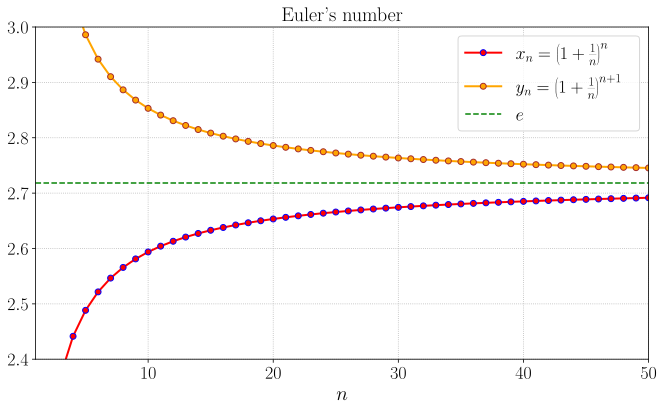

In [4]:
# plot_euler_sequences(1000, 50)
plot_e_limit()

<span style="display:none" id="q_e_sequences">W3sicXVlc3Rpb24iOiAiXHUwNDFhXHUwNDMwXHUwNDNhXHUwNDM4XHUwNDM1IFx1MDQzNVx1MDQ0OVx1MDQ1MSBcdTA0MzJcdTA0NGJcdTA0MzJcdTA0M2VcdTA0MzRcdTA0NGIgXHUwNDNlIFx1MDQzZlx1MDQzZVx1MDQ0MVx1MDQzYlx1MDQzNVx1MDQzNFx1MDQzZVx1MDQzMlx1MDQzMFx1MDQ0Mlx1MDQzNVx1MDQzYlx1MDQ0Y1x1MDQzZFx1MDQzZVx1MDQ0MVx1MDQ0Mlx1MDQ0Zlx1MDQ0NSAkeF9uID0gXFxiaWcoMSArIFxcZnJhYyAxblxcYmlnKV57bn0kIFx1MDQzOCAkeV9uID0gIFxcYmlnKDEgKyBcXGZyYWMgMW5cXGJpZylee24rMX0kIFx1MDQzY1x1MDQzZVx1MDQzNlx1MDQzZFx1MDQzZSBcdTA0NDFcdTA0MzRcdTA0MzVcdTA0M2JcdTA0MzBcdTA0NDJcdTA0NGMgXHUwNDM4XHUwNDQxXHUwNDQ1XHUwNDNlXHUwNDM0XHUwNDRmIFx1MDQzOFx1MDQzNyBcdTA0M2ZcdTA0NDBcdTA0MzVcdTA0MzRcdTA0NGJcdTA0MzRcdTA0NDNcdTA0NDlcdTA0MzVcdTA0MzNcdTA0M2UgXHUwNDMzXHUwNDQwXHUwNDMwXHUwNDQ0XHUwNDM4XHUwNDNhXHUwNDMwPyIsICJ0eXBlIjogIm1hbnlfY2hvaWNlIiwgImFuc3dlcnMiOiBbeyJhbnN3ZXIiOiAiJHhfbiA8IHhfe24rMX0kIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiXHUwNDFmXHUwNDNlXHUwNDQxXHUwNDNiXHUwNDM1XHUwNDM0XHUwNDNlXHUwNDMyXHUwNDMwXHUwNDQyXHUwNDM1XHUwNDNiXHUwNDRjXHUwNDNkXHUwNDNlXHUwNDQxXHUwNDQyXHUwNDRjICR4X24kIFx1MDQzMlx1MDQzZVx1MDQzN1x1MDQ0MFx1MDQzMFx1MDQ0MVx1MDQ0Mlx1MDQzMFx1MDQzNVx1MDQ0MiJ9LCB7ImFuc3dlciI6ICIkeV9uID4geV97bisxfSQiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJcdTA0MWZcdTA0M2VcdTA0NDFcdTA0M2JcdTA0MzVcdTA0MzRcdTA0M2VcdTA0MzJcdTA0MzBcdTA0NDJcdTA0MzVcdTA0M2JcdTA0NGNcdTA0M2RcdTA0M2VcdTA0NDFcdTA0NDJcdTA0NGMgJHlfbiQgXHUwNDQzXHUwNDMxXHUwNDRiXHUwNDMyXHUwNDMwXHUwNDM1XHUwNDQyIn0sIHsiYW5zd2VyIjogIiR4X24gPCB5X24kIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiXHUwNDFhXHUwNDQwXHUwNDMwXHUwNDQxXHUwNDNkXHUwNDMwXHUwNDRmIFx1MDQzYlx1MDQzOFx1MDQzZFx1MDQzOFx1MDQ0ZiBcdTA0MzJcdTA0NDFcdTA0MzVcdTA0MzNcdTA0MzRcdTA0MzAgXHUwNDNkXHUwNDM4XHUwNDM2XHUwNDM1IFx1MDQzZVx1MDQ0MFx1MDQzMFx1MDQzZFx1MDQzNlx1MDQzNVx1MDQzMlx1MDQzZVx1MDQzOSJ9LCB7ImFuc3dlciI6ICIkXFxsaW1cXGxpbWl0c197blxcdG9cXGluZnR5fSB5X24gPSBlJCIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIiR5X24kIFx1MDQ0Zlx1MDQzMlx1MDQzZFx1MDQzZSBcdTA0NDFcdTA0NDVcdTA0M2VcdTA0MzRcdTA0MzhcdTA0NDJcdTA0NDFcdTA0NGYgXHUwNDQyXHUwNDQzXHUwNDM0XHUwNDMwIFx1MDQzNlx1MDQzNSwgXHUwNDNhXHUwNDQzXHUwNDM0XHUwNDMwIFx1MDQzOCAkeF9uJCwgXHUwNDQyXHUwNDNlXHUwNDNiXHUwNDRjXHUwNDNhXHUwNDNlIFx1MDQ0MSBcdTA0MzRcdTA0NDBcdTA0NDNcdTA0MzNcdTA0M2VcdTA0MzkgXHUwNDQxXHUwNDQyXHUwNDNlXHUwNDQwXHUwNDNlXHUwNDNkXHUwNDRiIn0sIHsiYW5zd2VyIjogIiR4X24gPSB5X24kIFx1MDQzZlx1MDQ0MFx1MDQzOCBcdTA0MzRcdTA0M2VcdTA0NDFcdTA0NDJcdTA0MzBcdTA0NDJcdTA0M2VcdTA0NDdcdTA0M2RcdTA0M2UgXHUwNDMxXHUwNDNlXHUwNDNiXHUwNDRjXHUwNDQ4XHUwNDM4XHUwNDQ1ICRuJCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MWRcdTA0MzVcdTA0NDIsIFx1MDQzZVx1MDQ0MFx1MDQzMFx1MDQzZFx1MDQzNlx1MDQzNVx1MDQzMlx1MDQzMFx1MDQ0ZiBcdTA0M2JcdTA0MzhcdTA0M2RcdTA0MzhcdTA0NGYgXHUwNDMyXHUwNDQxXHUwNDM1XHUwNDMzXHUwNDM0XHUwNDMwIFx1MDQzMVx1MDQ0M1x1MDQzNFx1MDQzNVx1MDQ0MiBcdTA0MzJcdTA0NGJcdTA0NDhcdTA0MzUgXHUwNDNhXHUwNDQwXHUwNDMwXHUwNDQxXHUwNDNkXHUwNDNlXHUwNDM5In0sIHsiYW5zd2VyIjogIiR5X24gLSB4X24gPCBcXGZyYWMgMW4kIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIlx1MDQxZFx1MDQzMFx1MDQzZlx1MDQ0MFx1MDQzOFx1MDQzY1x1MDQzNVx1MDQ0MCwgXHUwNDQwXHUwNDMwXHUwNDQxXHUwNDQxXHUwNDQyXHUwNDNlXHUwNDRmXHUwNDNkXHUwNDM4XHUwNDM1IFx1MDQzY1x1MDQzNVx1MDQzNlx1MDQzNFx1MDQ0MyAkeF97MTB9JCBcdTA0MzggJHlfezEwfSQgXHUwNDRmXHUwNDMyXHUwNDNkXHUwNDNlIFx1MDQzMVx1MDQzZVx1MDQzYlx1MDQ0Y1x1MDQ0OFx1MDQzNSAwLjEifV19XQ==</span>

In [64]:
display_quiz("#q_e_sequences")

<IPython.core.display.Javascript object>

## Немного теории о пределе последовательности

Из приведённой выше картинки вроде бы очевидно, что обе последовательности $x_n =  \big(1 + \frac 1n\big)^n$ и $y_n =  \big(1 + \frac 1n\big)^n$ монотонны и сходятся к числу $e$. Но *доказаны* ли эти факты?
Ведь мы видим там только $50$ первых членов этих последовательностей, мало ли что может случиться при $n=1000, 10^6, 10^{100}$ и т.д.

````{admonition} О доказательствах в математике
:class: warning, dropdown

Вопрос о верифицировании математического доказательства имеет социальную природу: утверждение считается доказанным, если сообщество математиков признало его таковым. Важно, что именно математиков; например, сообщество программистов, инженеров или поэтов вполне могло бы удовлетвориться сходящимися линиями на графике и счесть равенство {eq}`e-def` доказанным. Но вряд ли найдётся хоть один серьёзный математик, которого можно убедить в данной ситуации принять за доказательство компьютерные вычисления нескольких первых значений $x_n$ и сделанную на их основе иллюстрацию. 

Математик будет рассуждать примерно так: «Окей, численные расчёты убеждают меня на $99\%$, что утверждение верно; мне остаётся найти строгое доказательство этого факта, и тогда моя уверенность достигнет $100\%$» В этом смысле компьютрные вычисления часто бывают весьма полезны: они позволяют математику отбросить заведомо ложные утверждения и сконцентрировать свои усилия на доказательстве наиболее правдоподобных.
````

Существование предела {eq}`e-def` на строгом математическом уровне обычно устанавливается с помощью следующего утверждения.

```{prf:theorem} Вейерштрасс
:label: weierstrass
:nonumber:
Всякая монотонная ограниченная последовательность $(x_n)$ сходится, т.е. существует такое число $\alpha \in \mathbb R$, что $\lim\limits_{n\to \infty} x_n = \alpha$.
```

Вот как выглядит схема обоснования равенства {eq}`e-def` в типичном учебнике по матану:

````{prf:proof}

1. Проверяем, что последовательность $(x_n)$ возрастает;

2. проверяем, что последовательность $(y_n)$ убывает;

3. замечаем, что $y_n =  \big(1 + \frac 1n\big) x_n > x_n$;

4. из результата предыдущих шагов заключаем, что справедлива цепочка неравенств

    $$
        x_1 < x_2 < \ldots < x_{n-1} < x_n < y_n < y_{n-1} < \ldots < y_2 < y_1;
    $$

5. по теореме Вейерштрасса устанавливаем, что обе последовательности $(x_n)$ и $(y_n)$ сходятся;

6. замечаем, что 

    $$
    \lim\limits_{n\to \infty} y_n = \underbrace{\lim\limits_{n\to \infty} \Big(1 + \frac 1n\Big)}_{=1} \cdot\lim\limits_{n\to \infty} x_n = \lim\limits_{n\to \infty} x_n.
    $$

Таким образом, последовательности $(x_n)$ и $(y_n)$ имеют общий предел, который по определению и называется числом $e$.
````

В целом уже неплохо, не хватает только обоснования первых двух пунктов. Установим первый, второй проверяется аналогично.

````{admonition} Доказательство монотонности последовательности $x_n$
:class: tip, dropdown

Докажем, что $x_n < x_{n+1}$ при всех $n \in \mathbb N$. Имеем

```{math}
:label: x-estimate
    \begin{multline*}
    \frac{x_{n+1}}{x_n} = \frac{\big(\frac{n+2}{n+1}\big)^{n+1}}{\big(\frac{n+1}{n}\big)^{n}} = \frac{n+2}{n+1} 
    \bigg(\frac{n(n+2)}{(n+1)^2}\bigg)^n = \\
    =\Big(1 + \frac 1{n+1}\Big) \bigg(1 - \frac{1}{(n+1)^2}\bigg)^n.
    \end{multline*}
```

Теперь воспользуемся следующим утверждением.

```{admonition} Неравенство Бернулли
:class: note

Если $x > -1$, то $(1 + x)^n \geqslant 1+nx$ при всех $n\in\mathbb N$.
```

Согласно неравенству Бернулли

$$
    \bigg(1 - \frac{1}{(n+1)^2}\bigg)^n \geqslant 1 - \frac n{(n+1)^2} = 1 - \frac 1{n+1} + \frac 1{(n+1)^2}.
$$

Обозначим $t = \frac 1{n+1}$, тогда из {eq}`x-estimate` следует, что

$$
    \frac{x_{n+1}}{x_n} \geqslant (1+t)(1-t+t^2) = 1 + t^3 > 1.
$$

Итак, $x_{n+1} > x_n$, т.е. последовательность $(x_n)$ возрастает.
````

Остался последний штрих: в п. 6 мы воспользовались тем, что предел произведения равен произведению пределов и $\lim\limits_{n\to \infty} \frac 1n = 0$. Последнее равенство будем считать интуитивно очевидным: в самом деле, если $n$ может быть сколь угодно велико, то $\frac 1n$ — сколь угодно мало. Арифметика же предела описывается следующей теоремой. 

```{prf:theorem} арифметические свойства предела
:label: arithmetic-limit
:nonumber:

Если $\lim\limits_{n\to \infty} a_n = a$ и $\lim\limits_{n\to \infty} b_n = b$, то

* $\lim\limits_{n\to \infty} (a_n \pm b_n) = a \pm b$;
* $\lim\limits_{n\to \infty} (a_n b_n) = ab$;
* $\lim\limits_{n\to \infty} \frac{a_n}{b_n} = \frac ab$

(последнее равенство верно, если $b\ne 0$ и $b_n\ne 0$ при всех $n\in\mathbb N$).
```

Часто бывает полезно ещё одно утверждение о пределах.

```{prf:theorem} о двух милиционерах
:label: bounded-conv
:nonumber:
Если $a_n \leqslant b_n \leqslant c_n$ при всех $n\in\mathbb N$ и $\lim\limits_{n\to \infty} a_n = \lim\limits_{n\to \infty} с_n = a$, то $\lim\limits_{n\to \infty} b_n = a$.
```

В этой теореме последовательности $(a_n)$ и $(c_n)$ играют роль «милиционеров» и заставляют сходиться последовательность $(b_n)$ к их общему пределу.

## Задачи

1. Вы положили $\$1$ в банк под $100\%$ годовых. Сколько денег будет у вас на вкладе через $10$ лет при непрерывной капитализации процентов?

2. Вы положили $\$1$ в банк на год под $100\%$ годовых. Также вы можете выбрать любое число $p \in [0; 1]$. После истечения $p$-й части года банк делает капитализацию процентов, и затем ещё раз в конце года. Чему равна сумма вашего вклада по истечении года? При каком $p$ она максимальна?

2. Докажите **неравенство Бернулли** $(1 + x)^n \geqslant 1+nx$, $x > -1$, $n \in\mathbb N$.

3. Докажите, что последовательность $y_n = \big(1+\frac 1n\big)^{n+1}$ убывает, т.е. $y_{n+1} < y_n$ при всех $n \in\mathbb N$.

4. Найдите $\lim\limits_{n\to \infty} \big(1-\frac 1n\big)^n$.